In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_mkt = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")

In [4]:
data_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [5]:
data_mkt.describe

<bound method NDFrame.describe of       offer expiration     income_range no_visited_Cold drinks  \
0                2days  ₹100000 or More                    4~8   
1                2days  ₹87500 - ₹99999                    4~8   
2                2days  ₹87500 - ₹99999                  less1   
3              10hours  ₹37500 - ₹49999                  less1   
4                2days  ₹100000 or More                  never   
...                ...              ...                    ...   
12374          10hours  ₹25000 - ₹37499                  less1   
12375            2days  ₹25000 - ₹37499                    4~8   
12376          10hours  ₹87500 - ₹99999                    4~8   
12377          10hours  ₹12500 - ₹24999                    4~8   
12378            2days  ₹37500 - ₹49999                    1~3   

       travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                         1                     less1   
1                          

In [6]:
data_mkt["income_range"].unique()

array(['₹100000 or More', '₹87500 - ₹99999', '₹37500 - ₹49999',
       'Less than ₹12500', '₹50000 - ₹62499', '₹12500 - ₹24999',
       '₹75000 - ₹87499', '₹25000 - ₹37499', '₹62500 - ₹74999'],
      dtype=object)

In [7]:
len(data_mkt.columns)

31

In [8]:
data_mkt["offer expiration"].unique()

array(['2days', '10hours'], dtype=object)

In [9]:
data_mkt['no_visited_Cold drinks'].unique()

array(['4~8', 'less1', 'never', '1~3', 'gt8', nan], dtype=object)

In [10]:
data_mkt['travelled_more_than_15mins_for_offer'].unique()

array([1, 0])

In [11]:
data_mkt['Restaur_spend_less_than20'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never', nan], dtype=object)

In [12]:
for column in data_mkt.columns:
    print(data_mkt[column].unique())
    print(column)

['2days' '10hours']
offer expiration
['₹100000 or More' '₹87500 - ₹99999' '₹37500 - ₹49999' 'Less than ₹12500'
 '₹50000 - ₹62499' '₹12500 - ₹24999' '₹75000 - ₹87499' '₹25000 - ₹37499'
 '₹62500 - ₹74999']
income_range
['4~8' 'less1' 'never' '1~3' 'gt8' nan]
no_visited_Cold drinks
[1 0]
travelled_more_than_15mins_for_offer
['less1' '4~8' '1~3' 'gt8' 'never' nan]
Restaur_spend_less_than20
['Married partner' 'Single' 'Divorced' 'Unmarried partner' 'Widowed']
Marital Status
['4 star restaurant' 'Take-away restaurant' 'Cold drinks'
 'Restaurant with pub' '2 star restaurant']
restaurant type
['36' '50plus' '26' '46' '21' 'below21' '41' '31']
age
[0 1]
Prefer western over chinese
[0 1]
travelled_more_than_25mins_for_offer
[1]
travelled_more_than_5mins_for_offer
['less1' 'never' '1~3' nan '4~8' 'gt8']
no_visited_bars
['Female' 'Male']
gender
[nan 'Mazda5' 'Car that is too old to install Onstar :D' 'crossover'
 'Scooter and motorcycle' 'do not drive']
car
[0 1]
restuarant_same_direction_house
[1

In [13]:
data_mkt.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

<AxesSubplot:>

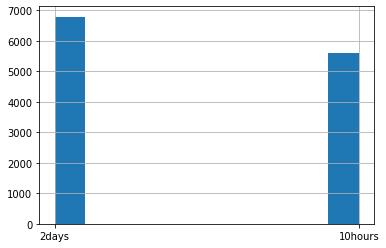

In [14]:
data_mkt['offer expiration'].hist()

In [15]:
data_mkt=data_mkt.drop(['car'],axis=1)

In [16]:
data_mkt.isnull().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                  198
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20               121
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
travelled_more_than_5mins_for_offer       0
no_visited_bars                          93
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                           144
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (av

In [17]:
data_mkt.describe()

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Travel Time,Prefer home food
count,12379.000000,12379.000000,12379.000000,12379.0,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000
mean,0.565393,0.506665,0.119396,1.0,0.213426,0.499556,0.502706,0.787382,0.415623,1.987802,71.139187,13.947896,0.509815
std,0.495725,0.499976,0.324267,0.0,0.409742,0.500020,0.500013,0.409176,0.492849,1.421653,19.215969,5.395232,0.499924
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,67.000000,10.000000,0.000000
50%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,67.000000,14.000000,1.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,89.000000,22.000000,1.000000


In [18]:
corr_matrix = data_mkt.corr()

<AxesSubplot:>

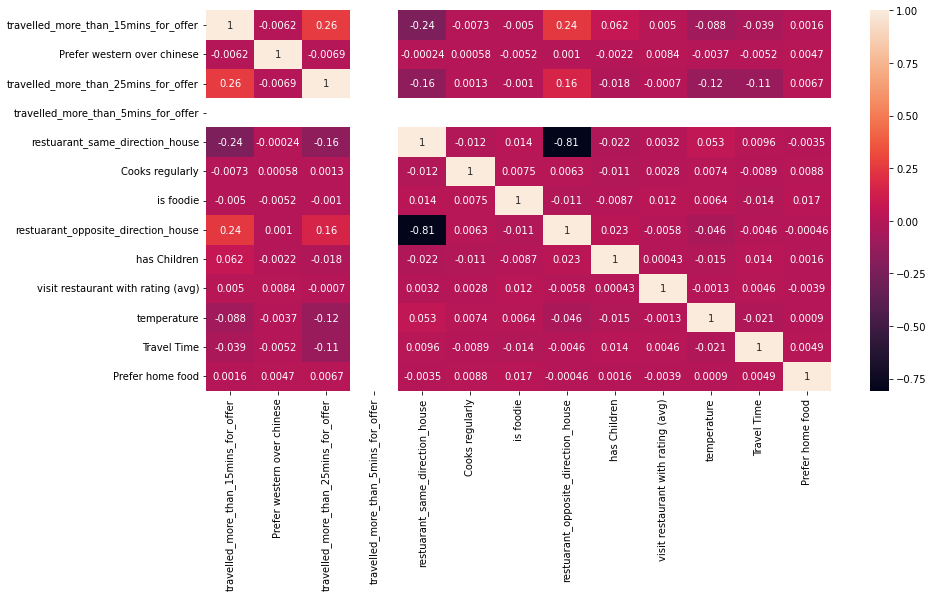

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
si=SimpleImputer(strategy="most_frequent")

In [22]:
data_imputed = si.fit_transform(data_mkt)

In [23]:
cols=['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
        'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted']
data_imputed = pd.DataFrame(data_imputed,columns=cols)

In [24]:
data_imputed.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

In [25]:
for column in data_imputed.columns:
    print(data_imputed[column].unique())
    print(column)

['2days' '10hours']
offer expiration
['₹100000 or More' '₹87500 - ₹99999' '₹37500 - ₹49999' 'Less than ₹12500'
 '₹50000 - ₹62499' '₹12500 - ₹24999' '₹75000 - ₹87499' '₹25000 - ₹37499'
 '₹62500 - ₹74999']
income_range
['4~8' 'less1' 'never' '1~3' 'gt8']
no_visited_Cold drinks
[1 0]
travelled_more_than_15mins_for_offer
['less1' '4~8' '1~3' 'gt8' 'never']
Restaur_spend_less_than20
['Married partner' 'Single' 'Divorced' 'Unmarried partner' 'Widowed']
Marital Status
['4 star restaurant' 'Take-away restaurant' 'Cold drinks'
 'Restaurant with pub' '2 star restaurant']
restaurant type
['36' '50plus' '26' '46' '21' 'below21' '41' '31']
age
[0 1]
Prefer western over chinese
[0 1]
travelled_more_than_25mins_for_offer
[1]
travelled_more_than_5mins_for_offer
['less1' 'never' '1~3' '4~8' 'gt8']
no_visited_bars
['Female' 'Male']
gender
[0 1]
restuarant_same_direction_house
[1 0]
Cooks regularly
['Individual' 'With Family' 'With Kids' 'With Colleagues']
Customer type
['Bachelors degree' 'Some college 

In [26]:
# Coding of undecipherable inputs in all columns requiring ordinal encoding
dec_num = {"offer expiration":{"2days":1,'10hours':2},"income_range":{'Less than ₹12500':1,'₹12500 - ₹24999':2,'₹25000 - ₹37499':3,'₹37500 - ₹49999':4,'₹50000 - ₹62499':5,'₹62500 - ₹74999':6,'₹75000 - ₹87499':7,'₹87500 - ₹99999':8, '₹100000 or More':9},'no_visited_Cold drinks'
:{'never':1,'less1': 2,'1~3': 3, '4~8': 4, 'gt8':5},"Restaur_spend_less_than20" :{'less1':1,'1~3':2,'4~8':3,'gt8':4,'never':5},"restaurant type":{'Cold drinks':1,'Take-away restaurant':2,'Restaurant with pub':3,'2 star restaurant':4,'4 star restaurant':5},"age":{'below21':1,'21':2,'26':3,'31':4,'36':5,'41':6,'46':7,'50plus':8},"no_Take-aways":{'never':1,'less1':2,'1~3':3,'4~8':4,'gt8':5},'no_visited_bars'
:{'never':1,'less1':2,'1~3':3,'4~8':4,'gt8':5},"Restaur_spend_greater_than20" :{'less1':1,'1~3':2,'4~8':3,'gt8':4,'never':5}}

In [27]:
data_imputed = data_imputed.replace(dec_num)

In [28]:
data_imputed[:5]

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,1,9,4,1,1,Married partner,5,5,0,0,...,0,0,4,67,1,22,Spring,Location B,0,No
1,1,8,4,0,3,Married partner,2,8,0,0,...,0,1,3,89,2,18,Summer,Location B,0,Yes
2,1,8,2,1,2,Single,1,3,1,0,...,1,1,4,67,1,7,Winter,Location A,1,Yes
3,2,4,2,0,2,Single,2,7,1,0,...,0,1,3,89,2,7,Summer,Location C,0,No
4,1,9,1,1,2,Single,5,2,0,1,...,1,0,3,40,1,7,Summer,Location C,0,No


In [29]:
data_imputed.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'restuarant_same_direction_house', 'Cooks regularly', 'Customer type',
       'Qualification', 'is foodie', 'no_Take-aways', 'Job/Job Industry',
       'restuarant_opposite_direction_house', 'has Children',
       'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

In [30]:
#Encoding

num_attrib = ["temperature", "Travel Time"]
nom_attrib = ["travelled_more_than_15mins_for_offer","Marital Status","Prefer western over chinese","Qualification","travelled_more_than_25mins_for_offer","travelled_more_than_5mins_for_offer","gender","restuarant_same_direction_house","Cooks regularly","Customer type","is foodie","Job/Job Industry","restuarant_opposite_direction_house","has Children","Climate","drop location","Prefer home food","Offer Accepted"]
              
ord_attrib = ["offer expiration","income_range","no_visited_Cold drinks","Restaur_spend_less_than20","restaurant type","no_Take-aways","no_visited_bars","age","Restaur_spend_greater_than20","visit restaurant with rating (avg)"]

In [31]:
print(len(num_attrib)+len(nom_attrib)+len(ord_attrib))

30


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [34]:
t= [("num",MinMaxScaler(),num_attrib),("ord",OrdinalEncoder(),ord_attrib),("cat",OneHotEncoder(sparse=False),nom_attrib)]

pipeline = ColumnTransformer(transformers=t)

data_encoded = pipeline.fit_transform(data_imputed)

data_encoded[:,3]


array([8., 7., 7., ..., 7., 1., 3.])

In [35]:
cols = num_attrib+ord_attrib+nom_attrib
print(cols)

['temperature', 'Travel Time', 'offer expiration', 'income_range', 'no_visited_Cold drinks', 'Restaur_spend_less_than20', 'restaurant type', 'no_Take-aways', 'no_visited_bars', 'age', 'Restaur_spend_greater_than20', 'visit restaurant with rating (avg)', 'travelled_more_than_15mins_for_offer', 'Marital Status', 'Prefer western over chinese', 'Qualification', 'travelled_more_than_25mins_for_offer', 'travelled_more_than_5mins_for_offer', 'gender', 'restuarant_same_direction_house', 'Cooks regularly', 'Customer type', 'is foodie', 'Job/Job Industry', 'restuarant_opposite_direction_house', 'has Children', 'Climate', 'drop location', 'Prefer home food', 'Offer Accepted']
